In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as skpp
import scipy.sparse.linalg as ll

In [2]:
food = pd.read_csv('food-consumption.csv').values
food = np.delete(food,10,0)
food = np.delete(food,12,0)
food = np.delete(food,12,0)
food

array([['Germany', 90, 49, 88, 19.0, 57.0, 51, 19, 21, 27, 21, 81, 75,
        44, 71, 22, 91, 85, 74, 30.0, 26],
       ['Italy', 82, 10, 60, 2.0, 55.0, 41, 3, 2, 4, 2, 67, 71, 9, 46,
        80, 66, 24, 94, 5.0, 18],
       ['France', 88, 42, 63, 4.0, 76.0, 53, 11, 23, 11, 5, 87, 84, 40,
        45, 88, 94, 47, 36, 57.0, 3],
       ['Holland', 96, 62, 98, 32.0, 62.0, 67, 43, 7, 14, 14, 83, 89, 61,
        81, 15, 31, 97, 13, 53.0, 15],
       ['Belgium', 94, 38, 48, 11.0, 74.0, 37, 23, 9, 13, 12, 76, 76, 42,
        57, 29, 84, 80, 83, 20.0, 5],
       ['Luxembourg', 97, 61, 86, 28.0, 79.0, 73, 12, 7, 26, 23, 85, 94,
        83, 20, 91, 94, 94, 84, 31.0, 24],
       ['England', 27, 86, 99, 22.0, 91.0, 55, 76, 17, 20, 24, 76, 68,
        89, 91, 11, 95, 94, 57, 11.0, 28],
       ['Portugal', 72, 26, 77, 2.0, 22.0, 34, 1, 5, 20, 3, 22, 51, 8,
        16, 89, 65, 78, 92, 6.0, 9],
       ['Austria', 55, 31, 61, 15.0, 29.0, 33, 1, 5, 15, 11, 49, 42, 14,
        41, 51, 51, 72, 28, 13.0, 1

In [3]:
food2 = pd.read_csv('food-consumption.csv')
foods = list(food2.columns)[1:21]
countries = food[:,0]
Inew = np.array(list(range(1,21))).astype(np.float64)
food = np.array(food[:,1:21],dtype=np.float64)
m,n = food.shape
food[0:3,:]

array([[90., 49., 88., 19., 57., 51., 19., 21., 27., 21., 81., 75., 44.,
        71., 22., 91., 85., 74., 30., 26.],
       [82., 10., 60.,  2., 55., 41.,  3.,  2.,  4.,  2., 67., 71.,  9.,
        46., 80., 66., 24., 94.,  5., 18.],
       [88., 42., 63.,  4., 76., 53., 11., 23., 11.,  5., 87., 84., 40.,
        45., 88., 94., 47., 36., 57.,  3.]])

In [4]:
stdA = np.std(food,axis = 0)
stdA = skpp.normalize(stdA.reshape(1,-1))
food = food @ np.diag(np.ones(stdA.shape[1])/stdA[0])

In [5]:
mu = np.mean(food,axis = 1)
xc = food - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)
S = np.real(S)
W = np.real(W)

In [6]:
dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0])
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1])

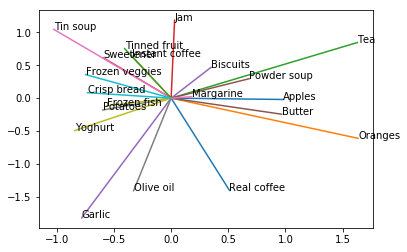

In [7]:
food_fig = plt.figure()
for i in range(0,20):
    food_fig.gca().plot([0,dim1[i]],[0,dim2[i]])
for i, txt in enumerate(foods):
    plt.annotate(txt, (dim1[i], dim2[i]))

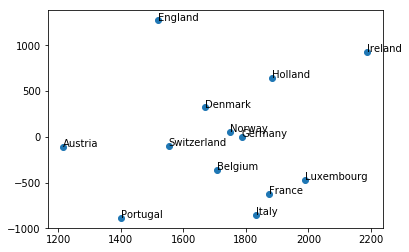

In [8]:
rep1 = np.dot(dim1,food.T)
rep2 = np.dot(dim2,food.T)
rep_fig = plt.figure()
rep_fig.gca().scatter(rep1,rep2)
for i, txt in enumerate(countries):
    plt.annotate(txt, (rep1[i], rep2[i]))